 #          Chatbot for to Automatic Ticket Assignment 

## Project Description: Built a chatbot from scratch to handle customer queries, predict the category and assign ticket accordingly to respective team

In [ ]:
#  Importing required Libraries
import glob
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Appending / Merging all excel files to one.

In [ ]:
# Using Glob to view all files in the folder
glob.glob(r"C:\Users\91817\Downloads\final_data-20210524T063653Z-001\final_data\*.xlsx")

['C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\final_data\\activation_function.xlsx',
 'C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\final_data\\anaconda_installation.xlsx',
 'C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\final_data\\anaconda_navigator.xlsx',
 'C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\final_data\\anaconda_prompt.xlsx',
 'C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\final_data\\anaconda_query.xlsx',
 'C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\final_data\\assignment_data_visulization.xlsx',
 'C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\final_data\\assignment_evaluation.xlsx',
 'C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\final_data\\assignment_exception_handling.xlsx',
 'C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\final_data\\assignment_KNN.xlsx',
 'C:\\Users\\91817\\Downloads\\final_data-20210524T063653Z-001\\f

We have a total of 174 Excel files.

In the following Section we will append all 174 excel files to one using glob and concat function. 

We want the required columns "Intent" and "Content". So we will drop the other columns.


We will remove duplicates and convert the excel file to csv file. 



In [ ]:
!pip install xlrd

In [ ]:
! pip install openpyxl

In [ ]:
# Appending all excel files to one using glob and concat function. 
# Keeping columns "Intent" and "Content". Dropping all other columns.
# Converting to csv file.

ex_f=glob.glob(r"C:\Users\91817\Downloads\final_data-20210524T063653Z-001\final_data\*.xlsx")
ex_f
df = pd.concat([pd.read_excel(file).fillna(value = os.path.basename(file[0:-5])) for file in ex_f],ignore_index=True)
df.drop(['Unnamed: 0', 'id', 'displayName', 'originalarrivaltime', 'Slots','Unnamed: 6',"In DL where we will define forward or backward propogation"], axis=1, inplace=True)
df.to_csv('clean_data.csv',index = False)  
df

,content,Intent,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,In this video as Sudhansu sir explains that we...,activation_function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I have some doubts regarding Activation functi...,activation_function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Suppose i am using any activation function and...,activation_function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I know in case vanishing gradient weight of in...,activation_function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I am a student of DLCVNLP 25th batch and have ...,activation_function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52254,I wanted to know how do you call while attendi...,zoom_platform_query,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52255,DL Course today...zoom attendees reached 1000....,zoom_platform_query,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52256,Zoom app was not working well aind even attend...,zoom_platform_query,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52257,is their any change in settings that need to b...,zoom_platform_query,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Total number of rows of queries (content).
df.shape

(52259, 21)

In [ ]:
df.columns

Index(['content', 'Intent', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 7','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)
df

,content,Intent
0,In this video as Sudhansu sir explains that we...,activation_function
1,I have some doubts regarding Activation functi...,activation_function
2,Suppose i am using any activation function and...,activation_function
3,I know in case vanishing gradient weight of in...,activation_function
4,I am a student of DLCVNLP 25th batch and have ...,activation_function
...,...,...
52254,I wanted to know how do you call while attendi...,zoom_platform_query
52255,DL Course today...zoom attendees reached 1000....,zoom_platform_query
52256,Zoom app was not working well aind even attend...,zoom_platform_query
52257,is their any change in settings that need to b...,zoom_platform_query


In [ ]:
# Removing Duplicates
df.drop_duplicates('content', inplace=True, keep = 'last') 
df

,content,Intent
0,In this video as Sudhansu sir explains that we...,activation_function
1,I have some doubts regarding Activation functi...,activation_function
2,Suppose i am using any activation function and...,activation_function
3,I know in case vanishing gradient weight of in...,activation_function
4,I am a student of DLCVNLP 25th batch and have ...,activation_function
...,...,...
52254,I wanted to know how do you call while attendi...,zoom_platform_query
52255,DL Course today...zoom attendees reached 1000....,zoom_platform_query
52256,Zoom app was not working well aind even attend...,zoom_platform_query
52257,is their any change in settings that need to b...,zoom_platform_query


In [ ]:
# Total number of rows of queries (content) after removing the duplicates.
df.shape

(39119, 2)

In [ ]:
df.describe()

,content,Intent
count,39118,39119
unique,39118,177
top,thansk for your help,welcome_reply
freq,1,3530


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39119 entries, 0 to 52258
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  39118 non-null  object
 1   Intent   39119 non-null  object
dtypes: object(2)
memory usage: 916.9+ KB


In [ ]:
df.head()

,content,Intent
0,In this video as Sudhansu sir explains that we...,activation_function
1,I have some doubts regarding Activation functi...,activation_function
2,Suppose i am using any activation function and...,activation_function
3,I know in case vanishing gradient weight of in...,activation_function
4,I am a student of DLCVNLP 25th batch and have ...,activation_function


In [ ]:
df.isnull().count()

content    39119
Intent     39119
dtype: int64

In [ ]:
# Total number of unique Intents
len(df['Intent'].unique())

177

In [ ]:
# Total number of queries by individual intent category in descending order.
df['Intent'].value_counts()

welcome_reply       3530
internship_query    2953
batch_details       2502
user_email          2153
assignment_query    1254
                    ... 
cnn_query              4
dl_general_query       1
class_details          1
zoom_doubt             1
career_guidence        1
Name: Intent, Length: 177, dtype: int64

In [ ]:
# Top 10 Intents with most number of queries sorted by descending order.
df_top10= pd.DataFrame(df['Intent'].value_counts()[:10].sort_values(ascending=False))
df_top10.columns.values[0] = 'count'
df_top10.index.name = 'intent'
df_top10

,count
intent,
welcome_reply,3530
internship_query,2953
batch_details,2502
user_email,2153
assignment_query,1254
Greetings,1241
yes_reply,1174
course_details,1121
community_class,839


In [ ]:
#This function cleans the text. removes junk values as mentioned in the function.

def clean_text(content):
    content = content.str.replace("(<br/>)", "")
    content = content.str.replace('(<a).*(>).*(</a>)', '')
    content = content.str.replace('(&amp;)', '')
    content = content.str.replace('(&gt)', '')
    content = content.str.replace('(&lt)', '')
    content = content.str.replace('(\xa0)', ' ')
    content = content.str.replace('(&quot;)', '')
    content = content.str.replace('(&apos;)', '')   
    
    return content

df['content'] = clean_text(df['content'])

C:\Users\91817\anaconda3\envs\test1\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
C:\Users\91817\anaconda3\envs\test1\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\91817\anaconda3\envs\test1\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\91817\anaconda3\envs\test1\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
C:\Users\91817\anaconda3\envs\test1\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\91817\anaconda3\envs\test1\lib\site-packages\ipykernel_launch

In [ ]:
#Converts given string into lowercase

df["content"]=df['content'].str.lower()

In [ ]:
df.head()

,content,Intent
0,in this video as sudhansu sir explains that we...,activation_function
1,i have some doubts regarding activation functi...,activation_function
2,suppose i am using any activation function and...,activation_function
3,i know in case vanishing gradient weight of in...,activation_function
4,i am a student of dlcvnlp 25th batch and have ...,activation_function


In [ ]:
new_df = pd.Categorical(df['Intent'])
new_df

['activation_function', 'activation_function', 'activation_function', 'activation_function', 'activation_function', ..., 'zoom_platform_query', 'zoom_platform_query', 'zoom_platform_query', 'zoom_platform_query', 'zoom_platform_query']
Length: 39119
Categories (177, object): ['Bert_query', 'Cufflinks_installation', 'Dashboard_access', 'EDA_code', ..., 'youtube_video_availability', 'zoom_doubt', 'zoom_link_query', 'zoom_platform_query']

In [ ]:
# all categories file name in Intent feature column
df["Intent"].unique() 

array(['activation_function', 'anaconda_installation',
       'anaconda_navigator', 'anaconda_prompt', 'anaconda_query',
       'assignment_data_visulization', 'assignment_evaluation',
       'assignment_exception_handling', 'assignment_KNN',
       'assignment_LinearRegression', 'assignment_link',
       'assignment_matplotlib', 'assignment_numpy', 'assignment_pandas',
       'assignment_powerbi', 'assignment_python', 'assignment_query',
       'assignment_stats', 'assignment_submission',
       'aws_deployment_error', 'aws_lex_account_query',
       'azure_luis_deployment', 'batch_changed', 'batch_details',
       'Bert_query', 'blog', 'books_availablity_dashboard', 'bot_timing',
       'canvas_details_edit', 'canvas_link', 'career_transition',
       'career_guidence', 'certificates_enquery', 'chatbot_issue',
       'class_details', 'class_link', 'class_query', 'cmd',
       'cnn_question', 'cnn_query', 'colab_help', 'community_class',
       'community_class_certificates', 'communi

In [ ]:
sns.set(rc={'figure.figsize':(11.7,60.27)})

<AxesSubplot:xlabel='count', ylabel='Intent'>

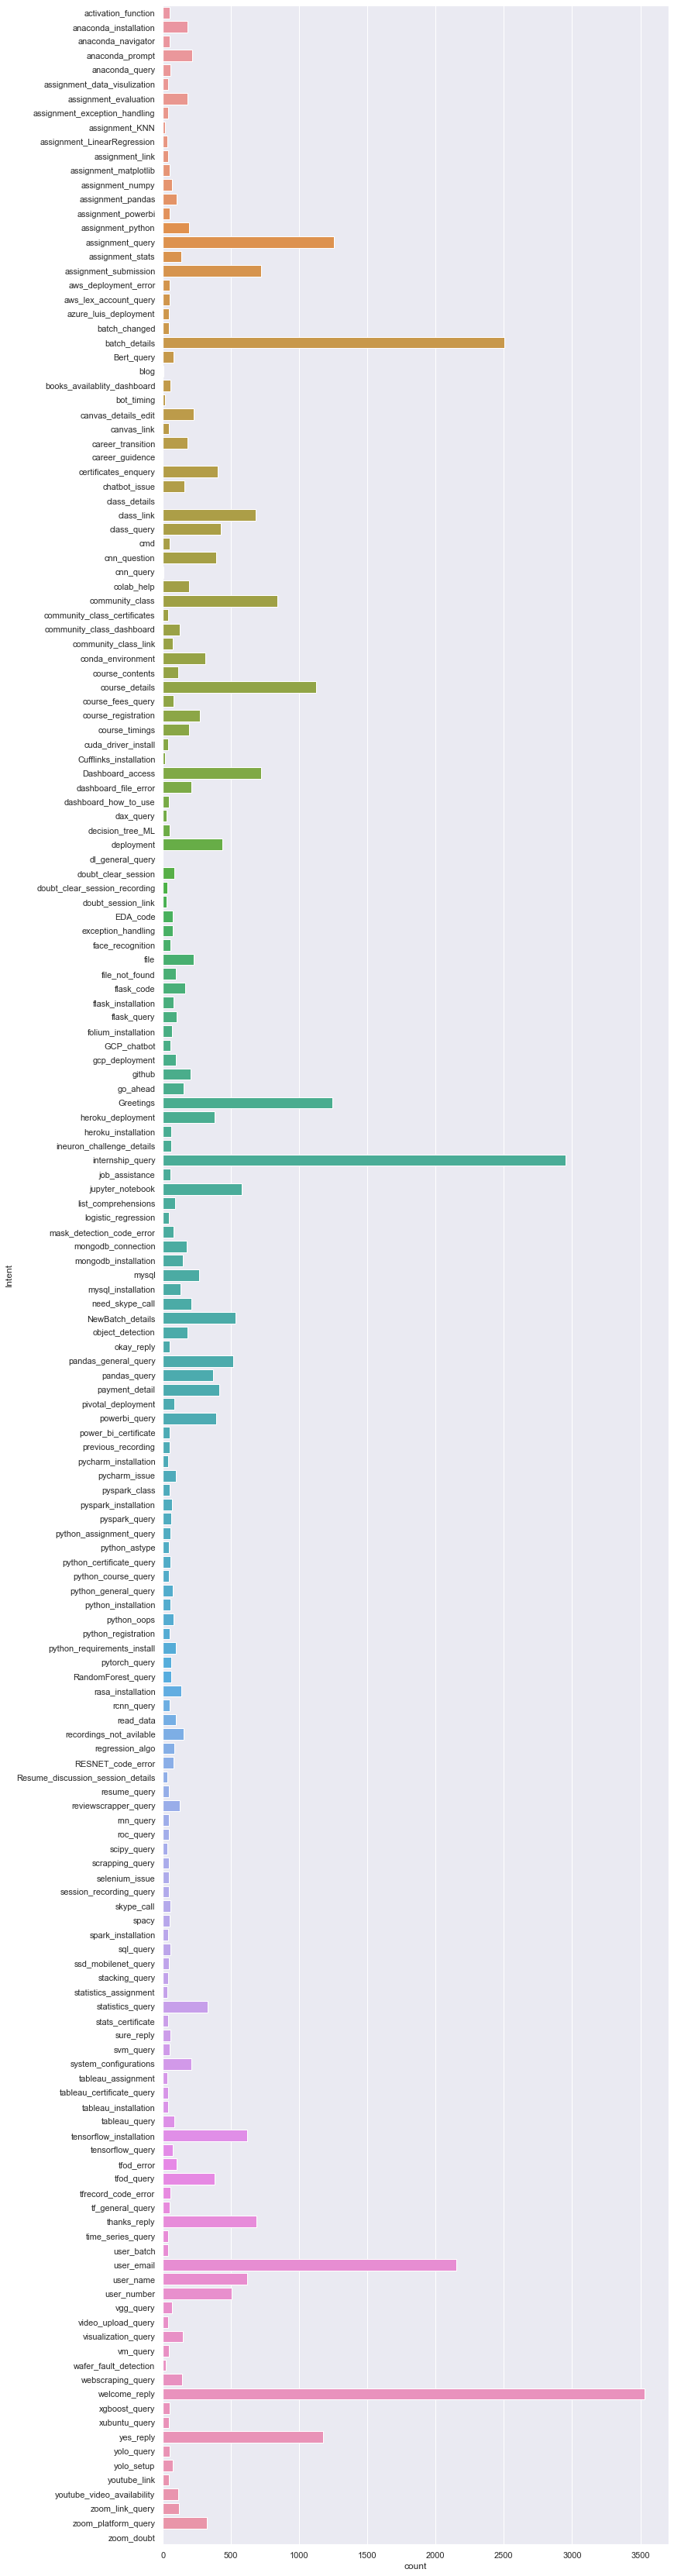

In [ ]:
# create a countplot to show the number of queries for each individual intent category in serial order.

sns.countplot(y='Intent', data=df)

<AxesSubplot:xlabel='count', ylabel='Intent'>

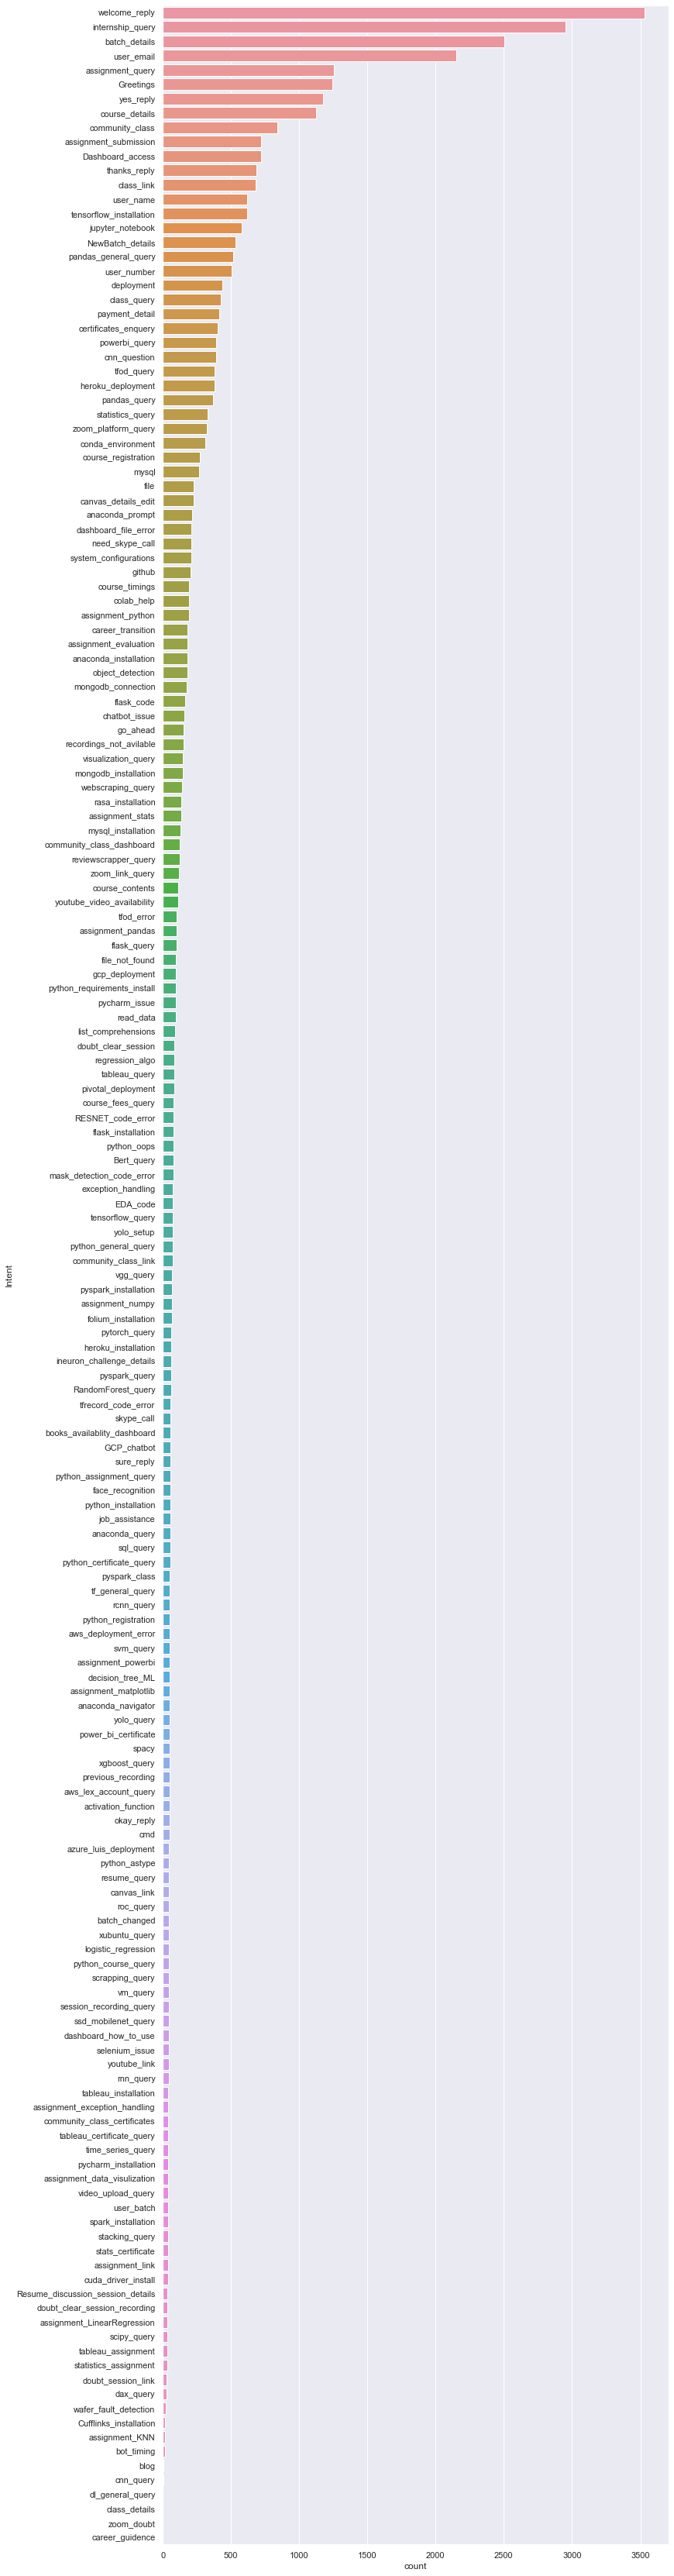

In [ ]:
# create a countplot to show the number of queries for each individual intent category in descending order.

sns.countplot(y='Intent', data=df, order=df['Intent'].value_counts().sort_values(ascending = False).index)

## Segregation of Intents

Dividing complete dataset into two sections by Type of Query: 1- Technical Queries(ML, DL, BA, Other) 2- Non Technical Queries.

Further dividing "Technical Queries" section into four subsection by Category: 1- Machine Learning, 2- Deep Learning, 3- Business Analytics, and  4- Other

Added column ("Type of Query") and ("Category") in dataset, which categorized each query by there respective domain.

Finally merging all dataframes in a single dataframe and creating a csv file.

## General / Non Technical Queries

Created a dataframe for Non Technical Queries as "general_df". 

Total number of Non Techincal intents are 64. 

In [ ]:
# Create list of general intents from complete dataset.
general_intents = ['batch_changed', 'batch_details', 'blog', 'books_availablity_dashboard', 'canvas_details_edit', 'canvas_link', 'career_transition', 'career_guidence', 'certificates_enquery', 'chatbot_issue', 'class_details',  'class_link', 'class_query', 'colab_help', 'community_class', 'community_class_certificates', 'community_class_dashboard',   'community_class_link', 'course_contents', 'course_details', 'course_fees_query', 'course_registration', 'course_timings', 'Dashboard_access', 'dashboard_how_to_use', 'doubt_clear_session', 'doubt_clear_session_recording', 'doubt_session_link', 'go_ahead', 'Greetings', 'ineuron_challenge_details', 'internship_query', 'job_assistance', 'need_skype_call', 'NewBatch_details', 'okay_reply', 'payment_detail', 'power_bi_certificate', 'previous_recording', 'python_certificate_query', 'python_course_query', 'python_registration', 'recordings_not_avilable', 'Resume_discussion_session_details', 'resume_query', 'session_recording_query', 'skype_call', 'stats_certificate', 'sure_reply', 'system_configurations', 'tableau_certificate_query', 'thanks_reply', 'user_batch', 'user_email', 'user_name', 'user_number', 'video_upload_query', 'welcome_reply', 'yes_reply', 'youtube_link', 'youtube_video_availability', 'zoom_link_query', 'zoom_platform_query', 'zoom_doubt']

In [ ]:
# Create list of 'Technical queries' intents from complete dataset.
technical_intents = ['activation_function', 'anaconda_installation', 'anaconda_navigator', 'anaconda_prompt', 'anaconda_query', 'assignment_data_visulization', 'assignment_evaluation',    'assignment_exception_handling', 'assignment_KNN', 'assignment_LinearRegression', 'assignment_link', 'assignment_matplotlib', 'assignment_numpy', 'assignment_pandas',      'assignment_powerbi', 'assignment_python', 'assignment_query', 'assignment_stats', 'assignment_submission', 'aws_deployment_error', 'aws_lex_account_query',  'azure_luis_deployment', 'Bert_query', 'bot_timing', 'cmd', 'cnn_question', 'cnn_query', 'conda_environment', 'cuda_driver_install', 'Cufflinks_installation', 'dax_query', 'decision_tree_ML', 'deployment', 'dl_general_query', 'EDA_code', 'exception_handling', 'face_recognition', 'file', 'file_not_found', 'flask_code', 'flask_installation', 'flask_query',    'folium_installation', 'GCP_chatbot', 'gcp_deployment', 'github', 'heroku_deployment', 'heroku_installation', 'jupyter_notebook', 'list_comprehensions', 'logistic_regression',    'mask_detection_code_error', 'mongodb_connection', 'mongodb_installation', 'mysql', 'mysql_installation', 'object_detection', 'pandas_general_query', 'pandas_query',      'pivotal_deployment', 'powerbi_query', 'pycharm_installation', 'pycharm_issue', 'pyspark_class', 'pyspark_installation', 'pyspark_query', 'python_assignment_query',   'python_astype', 'python_general_query', 'python_installation', 'python_oops', 'python_requirements_install', 'pytorch_query', 'RandomForest_query', 'rasa_installation', 'rcnn_query', 'read_data', 'regression_algo', 'RESNET_code_error', 'reviewscrapper_query', 'rnn_query', 'roc_query', 'scipy_query', 'scrapping_query', 'selenium_issue', 'spacy', 'spark_installation', 'sql_query', 'ssd_mobilenet_query', 'stacking_query', 'statistics_assignment', 'statistics_query', 'svm_query', 'tableau_assignment', 'tableau_installation', 'tableau_query', 'tensorflow_installation', 'tensorflow_query', 'tfod_error', 'tfod_query', 'tfrecord_code_error', 'tf_general_query', 'time_series_query', 'vgg_query',  'visualization_query', 'vm_query', 'wafer_fault_detection', 'webscraping_query', 'xgboost_query', 'xubuntu_query', 'yolo_query', 'yolo_setup']

In [ ]:
# getting general queries by segregating technical intents from dataset.
# create a dataframe for general queries.
# adding a column for type of query and category.
general_queries = df[~df.Intent.str.contains('|'.join(technical_intents))] 
general_df = pd.DataFrame(general_queries) 
general_df["Type of Query"] = "Non Technical" 
general_df["Category"] = "General" 
general_df

,content,Intent,Type of Query,Category
3748,i am harichandana\ni have been wondering if i ...,batch_changed,Non Technical,General
3749,"hi, i have enrolled in dlcvnlp 25th but upon f...",batch_changed,Non Technical,General
3750,"hi team , i was not able to attend classes for...",batch_changed,Non Technical,General
3751,can i cover them in new batch or i have to pay...,batch_changed,Non Technical,General
3752,requesting you to transfer me to dl 25th july ...,batch_changed,Non Technical,General
...,...,...,...,...
52254,i wanted to know how do you call while attendi...,zoom_platform_query,Non Technical,General
52255,dl course today...zoom attendees reached 1000....,zoom_platform_query,Non Technical,General
52256,zoom app was not working well aind even attend...,zoom_platform_query,Non Technical,General
52257,is their any change in settings that need to b...,zoom_platform_query,Non Technical,General


In [ ]:
 # list of all general / non technical intents.
general_queries['Intent'].unique()

array(['batch_changed', 'batch_details', 'blog',
       'books_availablity_dashboard', 'canvas_details_edit',
       'canvas_link', 'career_transition', 'career_guidence',
       'certificates_enquery', 'chatbot_issue', 'class_details',
       'class_link', 'class_query', 'colab_help', 'community_class',
       'community_class_certificates', 'community_class_dashboard',
       'community_class_link', 'course_contents', 'course_details',
       'course_fees_query', 'course_registration', 'course_timings',
       'Dashboard_access', 'dashboard_how_to_use', 'doubt_clear_session',
       'doubt_clear_session_recording', 'doubt_session_link', 'go_ahead',
       'Greetings', 'ineuron_challenge_details', 'internship_query',
       'job_assistance', 'need_skype_call', 'NewBatch_details',
       'okay_reply', 'payment_detail', 'power_bi_certificate',
       'previous_recording', 'python_certificate_query',
       'python_course_query', 'python_registration',
       'recordings_not_avilable', '

In [ ]:
# total no. of general / non technical intents.
len(general_queries['Intent'].unique()) 

64

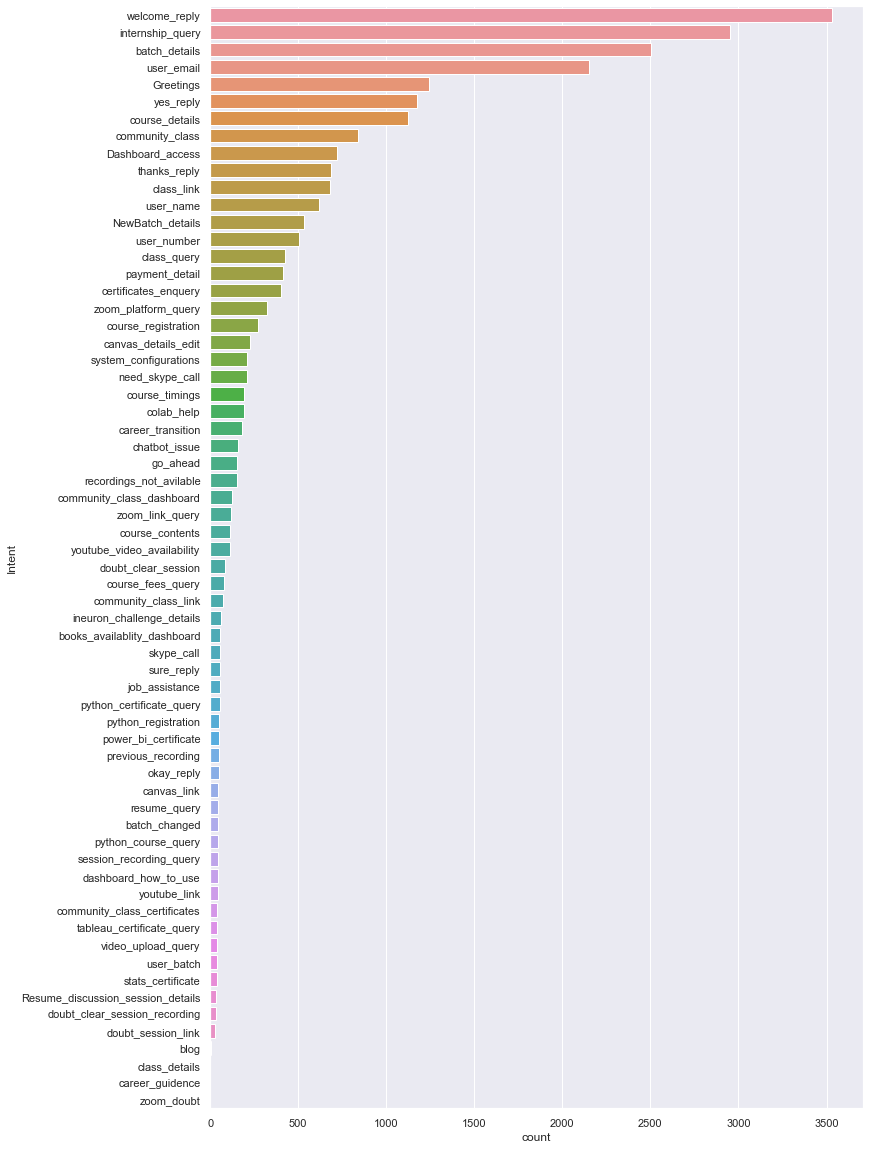

In [ ]:
# number of general / non technical queries by intent in descending order.
sns.set(rc={'figure.figsize':(11.7,20.27)})
sns.countplot(y='Intent', data=general_df, order=general_df['Intent'].value_counts().sort_values(ascending = False).index) 
plt.show()

## Technical Queries

Created a dataframe for Technical Queries as "technical_df".

Total number of Techincal intents are 113.

In [ ]:
# getting technical queries by segregating general intents from dataset.
# create a dataframe for technical queries.
# adding a column for query type.
technical_queries = df[~df.Intent.str.contains('|'.join(general_intents))] 
technical_df = pd.DataFrame(technical_queries) 
technical_df["Type of Query"] = "Technical"  
technical_df

,content,Intent,Type of Query
0,in this video as sudhansu sir explains that we...,activation_function,Technical
1,i have some doubts regarding activation functi...,activation_function,Technical
2,suppose i am using any activation function and...,activation_function,Technical
3,i know in case vanishing gradient weight of in...,activation_function,Technical
4,i am a student of dlcvnlp 25th batch and have ...,activation_function,Technical
...,...,...,...
51581,how to train your own yolov3 detector from scr...,yolo_setup,Technical
51582,running yolo v2 on the microsoft data science ...,yolo_setup,Technical
51583,how to install and compile yolo v4 with gpu en...,yolo_setup,Technical
51584,how to train your tiny-yolov3 model in google ...,yolo_setup,Technical


In [ ]:
 # list of all technical intents.
technical_df['Intent'].unique()

array(['activation_function', 'anaconda_installation',
       'anaconda_navigator', 'anaconda_prompt', 'anaconda_query',
       'assignment_data_visulization', 'assignment_evaluation',
       'assignment_exception_handling', 'assignment_KNN',
       'assignment_LinearRegression', 'assignment_link',
       'assignment_matplotlib', 'assignment_numpy', 'assignment_pandas',
       'assignment_powerbi', 'assignment_python', 'assignment_query',
       'assignment_stats', 'assignment_submission',
       'aws_deployment_error', 'aws_lex_account_query',
       'azure_luis_deployment', 'Bert_query', 'bot_timing', 'cmd',
       'cnn_question', 'cnn_query', 'conda_environment',
       'cuda_driver_install', 'Cufflinks_installation',
       'dashboard_file_error', 'dax_query', 'decision_tree_ML',
       'deployment', 'dl_general_query', 'EDA_code', 'exception_handling',
       'face_recognition', 'file', 'file_not_found', 'flask_code',
       'flask_installation', 'flask_query', 'folium_installatio

In [ ]:
# Total number of Technical intents.
len(technical_df['Intent'].unique()) 

113

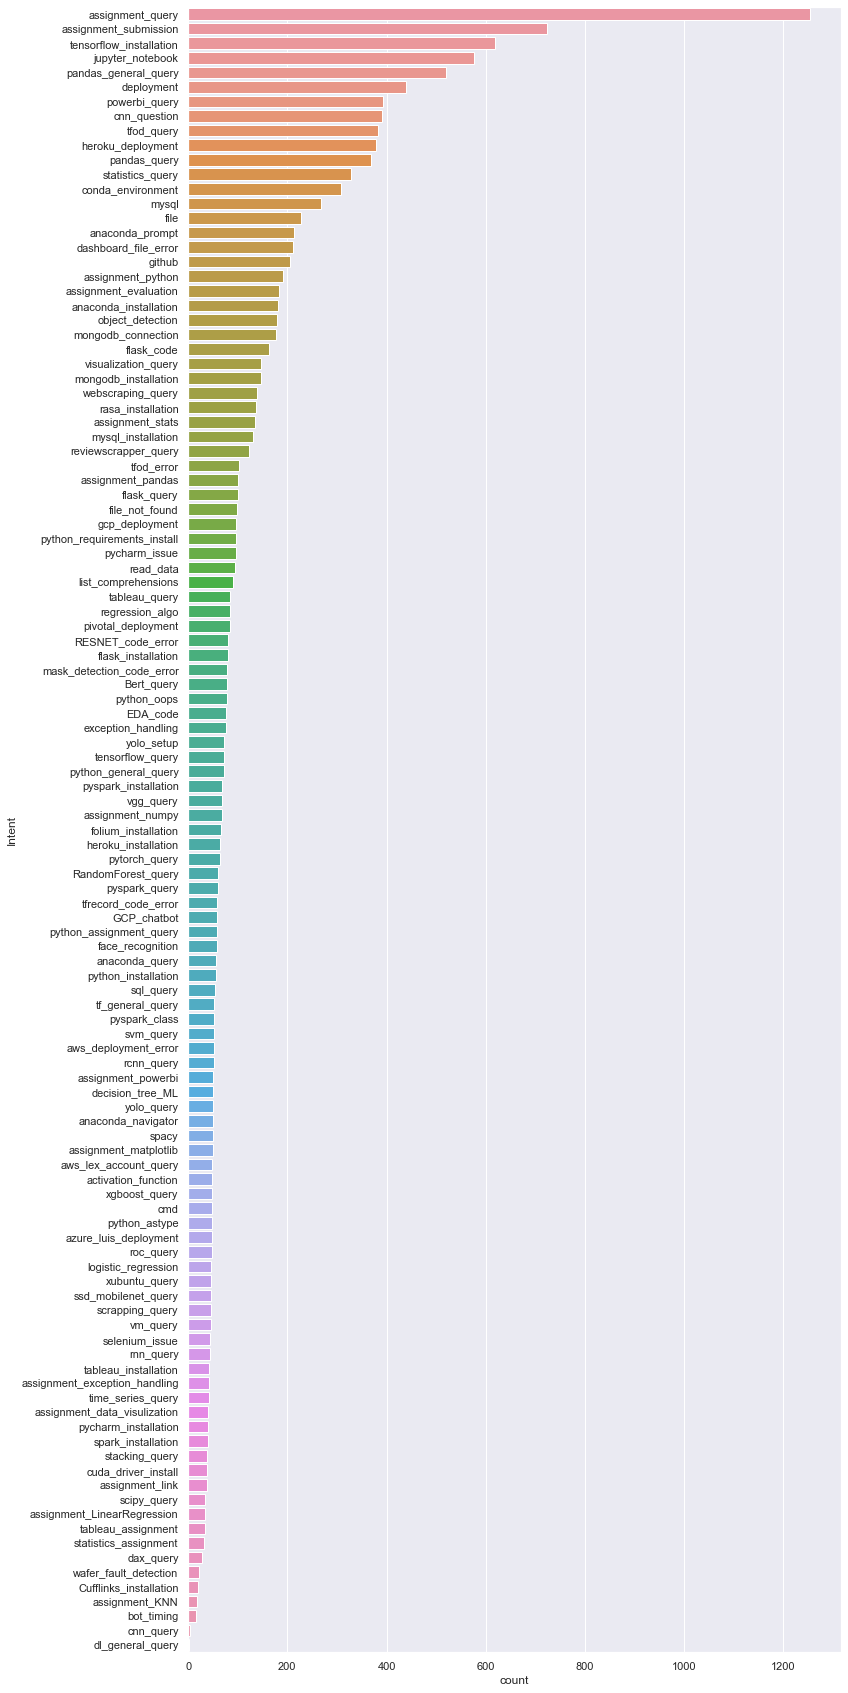

In [ ]:
# number of  technical queries by intent in descending order.
sns.set(rc={'figure.figsize':(11.7,30.27)})
sns.countplot(y='Intent', data=technical_df , order= technical_df['Intent'].value_counts().sort_values(ascending = False).index)  
plt.show()

## Segregation of Technical Queries to Different Categories (ML, DL, BA and Others)

## Machine Learning Queries

Created a dataframe for Machine Learning Queries as "ml_df".

Total number of Machine Learning intents are 33.

In [ ]:
# Create list of 'DL,BA,Other queries' intents from dataset for segregation of machine learning(ML) queries from technical queries dataset.

intent1 = ['activation_function','aws_deployment_error','azure_luis_deployment',  'Bert_query',  'bot_timing', 'cnn_question','cuda_driver_install', 'cnn_query', 'dl_general_query', 'face_recognition', 'GCP_chatbot', 'gcp_deployment', 'heroku_deployment', 'heroku_installation', 'mask_detection_code_error', 'object_detection',  'pivotal_deployment', 'pytorch_query', 'rcnn_query', 'RESNET_code_error', 'rnn_query', 'roc_query', 'spacy','ssd_mobilenet_query',  'tensorflow_installation', 'tensorflow_query', 'tfod_error',  'tfod_query', 'tfrecord_code_error', 'tf_general_query', 'vgg_query', 'yolo_query', 'yolo_setup', 'assignment_powerbi', 'dax_query', 'powerbi_query',  'tableau_assignment', 'tableau_installation', 'tableau_query', 'anaconda_installation', 'assignment_link','assignment_submission', 'anaconda_navigator', 'anaconda_prompt', 'anaconda_query', 'assignment_query', 'cmd', 'conda_environment', 'Cufflinks_installation', 'deployment', 'file', 'file_not_found',  'flask_code', 'flask_installation', 'flask_query', 'folium_installation', 'github',   'jupyter_notebook', 'mongodb_connection', 'mongodb_installation', 'mysql', 'mysql_installation', 'pycharm_installation', 'pycharm_issue', 'pyspark_class', 'pyspark_installation', 'pyspark_query', 'python_installation', 'python_assignment_query', 'python_requirements_install', 'scrapping_query', 'selenium_issue', 'spark_installation', 'sql_query', 'statistics_assignment', 'statistics_query','svm_query', 'vm_query', 'xubuntu_query']

In [ ]:
# getting Machine Learning(ML) queries by segregating 'DL,BA,Other' intents from Technical queries.
# create a dataframe for ML queries.
# adding column for query type and category.
ml_queries = technical_queries[~technical_queries.Intent.str.contains('|'.join(intent1))]  
ml_df = pd.DataFrame(ml_queries) 
ml_df["Type of Query"] = "Technical" 
ml_df[ "Category"] = "Machine learning"

ml_df

,content,Intent,Type of Query,Category
570,for assignment of data visualization we need t...,assignment_data_visulization,Technical,Machine learning
571,what exactly we need to do when we say convert...,assignment_data_visulization,Technical,Machine learning
572,yes sir. it is assignment for data visualization,assignment_data_visulization,Technical,Machine learning
573,this is the question sir,assignment_data_visulization,Technical,Machine learning
574,its there in visualization assignment,assignment_data_visulization,Technical,Machine learning
...,...,...,...,...
49561,dumping xgbclassifier model into text,xgboost_query,Technical,Machine learning
49562,trying to use xgboost for pairwise ranking,xgboost_query,Technical,Machine learning
49563,sklearn pass fit() parameters to xgboost in pi...,xgboost_query,Technical,Machine learning
49564,how to get actual feature names in xgboost fea...,xgboost_query,Technical,Machine learning


In [ ]:
# List of ML intents.
ml_df['Intent'].unique() 

array(['assignment_data_visulization', 'assignment_evaluation',
       'assignment_exception_handling', 'assignment_KNN',
       'assignment_LinearRegression', 'assignment_matplotlib',
       'assignment_numpy', 'assignment_pandas', 'assignment_python',
       'assignment_stats', 'aws_lex_account_query', 'decision_tree_ML',
       'EDA_code', 'exception_handling', 'list_comprehensions',
       'logistic_regression', 'pandas_general_query', 'pandas_query',
       'python_astype', 'python_general_query', 'python_oops',
       'RandomForest_query', 'rasa_installation', 'read_data',
       'regression_algo', 'reviewscrapper_query', 'scipy_query',
       'stacking_query', 'time_series_query', 'visualization_query',
       'wafer_fault_detection', 'webscraping_query', 'xgboost_query'],
      dtype=object)

In [ ]:
# Total number of ML intents.
len(ml_df['Intent'].unique())  

33

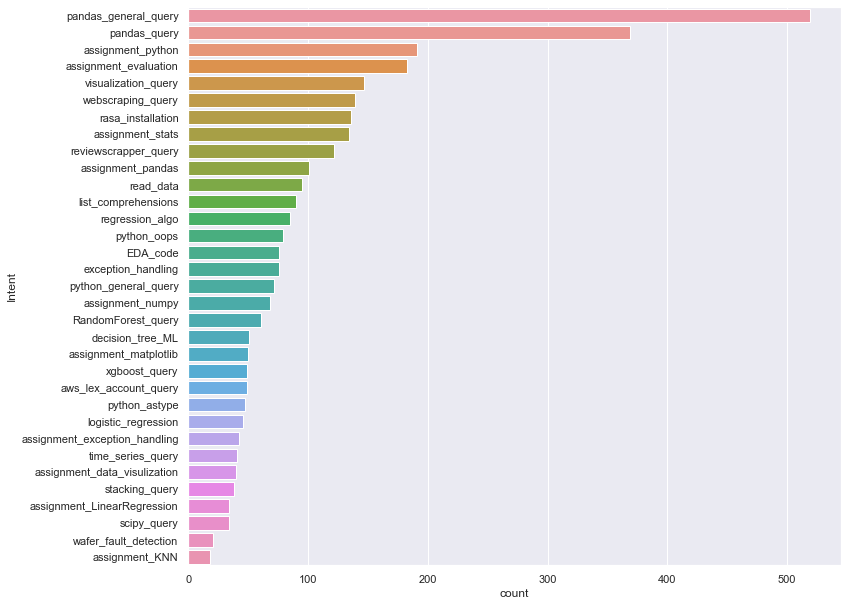

In [ ]:
# number of machine learning queries by intent in descending order.
sns.set(rc={'figure.figsize':(11.7,10.27)})
sns.countplot(y='Intent', data=ml_df, order=ml_df['Intent'].value_counts().sort_values(ascending = False).index)
plt.show()

## Deep Learning Queries 

Created a dataframe for Deep Learning Queries as "dl_df".

Total number of Deep Learning intents are 28.

In [ ]:
# Create list of 'ML,BA,Other queries' intents from dataset for segregation of deep learning(DL) queries from technical queries dataset.
intent2 = ['assignment_data_visulization', 'assignment_evaluation', 'assignment_exception_handling', 'assignment_KNN', 'assignment_LinearRegression', 'assignment_link',   'assignment_matplotlib', 'assignment_numpy', 'assignment_pandas', 'assignment_python' , 'assignment_stats',  'assignment_submission', 'aws_deployment_error', 'aws_lex_account_query', 'azure_luis_deployment', 'decision_tree_ML',  'EDA_code',   'exception_handling', 'gcp_deployment', 'heroku_deployment', 'list_comprehensions', 'logistic_regression', 'pandas_general_query', 'pandas_query', 'python_assignment_query', 'python_astype', 'python_general_query', 'pivotal_deployment', 'python_oops', 'RandomForest_query', 'rasa_installation', 'read_data', 'regression_algo', 'reviewscrapper_query', 'scipy_query', 'stacking_query', 'svm_query',  'time_series_query', 'visualization_query', 'wafer_fault_detection', 'webscraping_query', 'xgboost_query', 'assignment_powerbi', 'dax_query', 'powerbi_query',  'tableau_assignment', 'tableau_installation', 'tableau_query', 'anaconda_installation', 'anaconda_navigator', 'anaconda_prompt', 'anaconda_query', 'assignment_query', 'cmd', 'conda_environment', 'Cufflinks_installation', 'deployment', 'file', 'file_not_found',  'flask_code', 'flask_installation', 'flask_query', 'folium_installation', 'github',   'jupyter_notebook', 'mongodb_connection', 'mongodb_installation', 'mysql', 'mysql_installation', 'pycharm_installation', 'pycharm_issue', 'pyspark_class', 'pyspark_installation', 'pyspark_query', 'python_installation',  'python_requirements_install', 'scrapping_query', 'selenium_issue', 'spark_installation', 'sql_query', 'statistics_assignment', 'statistics_query', 'vm_query', 'xubuntu_query']

In [ ]:
# getting Deep Learning(DL) queries by segregating 'ML,BA,Other' intents from Technical queries.
# create a dataframe for DL queries.
# adding column for query type and category.
dl_queries = technical_queries[~technical_queries.Intent.str.contains('|'.join(intent2))] 
dl_df = pd.DataFrame(dl_queries)  
dl_df["Type of Query"] = "Technical" 
dl_df["Category"] = "Deep learning" 
dl_df

,content,Intent,Type of Query,Category
0,in this video as sudhansu sir explains that we...,activation_function,Technical,Deep learning
1,i have some doubts regarding activation functi...,activation_function,Technical,Deep learning
2,suppose i am using any activation function and...,activation_function,Technical,Deep learning
3,i know in case vanishing gradient weight of in...,activation_function,Technical,Deep learning
4,i am a student of dlcvnlp 25th batch and have ...,activation_function,Technical,Deep learning
...,...,...,...,...
51581,how to train your own yolov3 detector from scr...,yolo_setup,Technical,Deep learning
51582,running yolo v2 on the microsoft data science ...,yolo_setup,Technical,Deep learning
51583,how to install and compile yolo v4 with gpu en...,yolo_setup,Technical,Deep learning
51584,how to train your tiny-yolov3 model in google ...,yolo_setup,Technical,Deep learning


In [ ]:
# List of DL intents.
dl_df['Intent'].unique() 

array(['activation_function', 'Bert_query', 'bot_timing', 'cnn_question',
       'cnn_query', 'cuda_driver_install', 'dl_general_query',
       'face_recognition', 'GCP_chatbot', 'heroku_installation',
       'mask_detection_code_error', 'object_detection', 'pytorch_query',
       'rcnn_query', 'RESNET_code_error', 'rnn_query', 'roc_query',
       'spacy', 'ssd_mobilenet_query', 'tensorflow_installation',
       'tensorflow_query', 'tfod_error', 'tfod_query',
       'tfrecord_code_error', 'tf_general_query', 'vgg_query',
       'yolo_query', 'yolo_setup'], dtype=object)

In [ ]:
# Total number of DL intents.
len(dl_df['Intent'].unique()) 

28

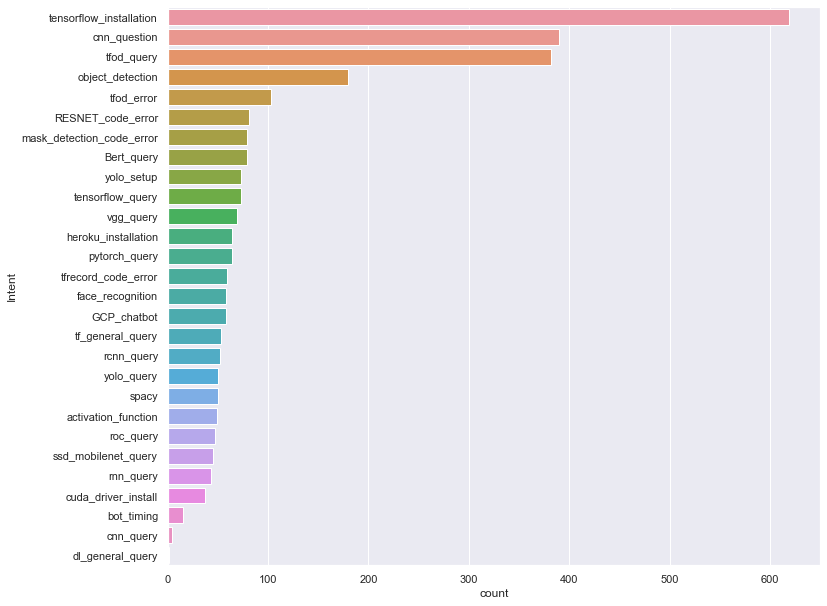

In [ ]:
# number of deep learning queries by intent in descending order.
sns.set(rc={'figure.figsize':(11.7,10.27)})
sns.countplot(y='Intent', data=dl_df, order=dl_df['Intent'].value_counts().sort_values(ascending = False).index) 
plt.show()

## Business Analytics Queries

Created a dataframe for Business Analytics Queries as "ba_df".

Total number of Business Analytics intents are 28.

In [ ]:
# Create list of 'DL,ML,Other queries' intents from dataset for segregation of Business Analytics(BA) queries from technical queries dataset.
intent3 = ['assignment_data_visulization', 'assignment_evaluation', 'assignment_exception_handling', 'assignment_KNN', 'assignment_LinearRegression', 'assignment_link',   'assignment_matplotlib', 'assignment_numpy', 'assignment_pandas', 'assignment_python' , 'assignment_stats',  'assignment_submission', 'aws_deployment_error', 'aws_lex_account_query', 'azure_luis_deployment', 'decision_tree_ML',  'EDA_code',   'exception_handling', 'list_comprehensions', 'logistic_regression', 'pandas_general_query', 'pandas_query', 'python_assignment_query', 'python_astype', 'python_general_query',  'python_oops', 'RandomForest_query', 'rasa_installation', 'read_data', 'regression_algo', 'reviewscrapper_query', 'scipy_query', 'stacking_query', 'svm_query',  'time_series_query', 'visualization_query', 'wafer_fault_detection', 'webscraping_query', 'xgboost_query', 'activation_function', 'Bert_query',  'bot_timing', 'cnn_question', 'cuda_driver_install','cnn_query', 'dl_general_query', 'face_recognition', 'GCP_chatbot', 'gcp_deployment', 'heroku_deployment', 'heroku_installation', 'mask_detection_code_error', 'object_detection',  'pivotal_deployment', 'pytorch_query', 'rcnn_query', 'RESNET_code_error', 'rnn_query', 'roc_query', 'spacy','ssd_mobilenet_query',  'tensorflow_installation', 'tensorflow_query', 'tfod_error',  'tfod_query', 'tfrecord_code_error', 'tf_general_query', 'vgg_query', 'yolo_query', 'yolo_setup', 'anaconda_installation', 'anaconda_navigator', 'anaconda_prompt', 'anaconda_query', 'assignment_query', 'cmd', 'conda_environment', 'Cufflinks_installation', 'deployment', 'file', 'file_not_found',  'flask_code', 'flask_installation', 'flask_query', 'folium_installation', 'github',   'jupyter_notebook', 'mongodb_connection', 'mongodb_installation', 'mysql', 'mysql_installation', 'pycharm_installation', 'pycharm_issue', 'pyspark_class', 'pyspark_installation', 'pyspark_query', 'python_installation',  'python_requirements_install', 'scrapping_query', 'selenium_issue', 'spark_installation', 'sql_query', 'statistics_assignment', 'statistics_query', 'vm_query', 'xubuntu_query']

In [ ]:
# getting Business Analytics(BA) queries by segregating 'DL,ML,Other' intents from Technical queries.
# create a dataframe for BA queries.
# adding column for query type and category.
ba_queries = technical_queries[~technical_queries.Intent.str.contains('|'.join(intent3))] 
ba_df = pd.DataFrame(ba_queries)  
ba_df["Type of Query"] = "Technical" 
ba_df["Category"] = "Business Analytics"  
ba_df

,content,Intent,Type of Query,Category
1163,regarding power bi project assignment submissi...,assignment_powerbi,Technical,Business Analytics
1164,i dont see the submission link in the dashboar...,assignment_powerbi,Technical,Business Analytics
1165,"hello sir, i have submitted the 2nd and 3rd as...",assignment_powerbi,Technical,Business Analytics
1166,"sir in power bi assignment, do i need to uploa...",assignment_powerbi,Technical,Business Analytics
1167,like in assignment 2 we have been told to crea...,assignment_powerbi,Technical,Business Analytics
...,...,...,...,...
35161,how do i create a calculation to view differen...,tableau_query,Technical,Business Analytics
35162,tableau calculate date difference,tableau_query,Technical,Business Analytics
35163,tableau: how can i measure similarity of sets ...,tableau_query,Technical,Business Analytics
35164,how to create drop down list in tableau dashbo...,tableau_query,Technical,Business Analytics


In [ ]:
# List of all BA intents.
ba_df['Intent'].unique() 

array(['assignment_powerbi', 'dax_query', 'powerbi_query',
       'tableau_assignment', 'tableau_installation', 'tableau_query'],
      dtype=object)

In [ ]:
 # Total number of BA intents.
len(ba_df['Intent'].unique()) 

6

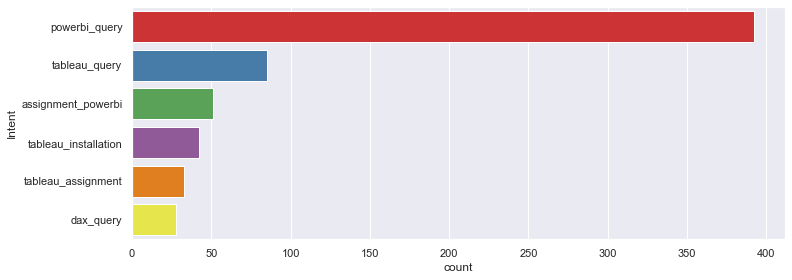

In [ ]:
# number of business analytics queries by intent in descending order.
sns.set(rc={'figure.figsize':(11.7,4.27)})
sns.set_palette("Set1")
sns.countplot(y='Intent', data=ba_df, order=ba_df['Intent'].value_counts().sort_values(ascending = False).index)
plt.show()

## Other Queries

Created a dataframe for Other Queries as "other_df".

Total number of Other intents are 46.

In [ ]:
# Create list of 'DL,ML,BA queries' intents from dataset for segregation of 'Other' queries from technical queries dataset.
intent4 = ['assignment_data_visulization', 'assignment_evaluation', 'assignment_exception_handling', 'assignment_KNN', 'assignment_LinearRegression',  'assignment_matplotlib', 'assignment_numpy', 'assignment_pandas', 'assignment_python' , 'assignment_stats',  'aws_lex_account_query', 'decision_tree_ML',  'EDA_code',   'exception_handling', 'list_comprehensions', 'logistic_regression', 'pandas_general_query', 'pandas_query','python_astype', 'python_general_query',  'python_oops', 'RandomForest_query', 'rasa_installation', 'read_data', 'regression_algo', 'reviewscrapper_query', 'scipy_query', 'stacking_query','time_series_query', 'visualization_query', 'wafer_fault_detection', 'webscraping_query', 'xgboost_query', 'activation_function', 'Bert_query',  'bot_timing', 'cnn_question', 'cuda_driver_install','cnn_query', 'dl_general_query', 'face_recognition', 'GCP_chatbot','heroku_installation', 'mask_detection_code_error', 'object_detection', 'pytorch_query', 'rcnn_query', 'RESNET_code_error', 'rnn_query', 'roc_query', 'spacy','ssd_mobilenet_query',  'tensorflow_installation', 'tensorflow_query', 'tfod_error',  'tfod_query', 'tfrecord_code_error', 'tf_general_query', 'vgg_query', 'yolo_query', 'yolo_setup', 'assignment_powerbi', 'dax_query', 'powerbi_query',  'tableau_assignment', 'tableau_installation', 'tableau_query']

In [ ]:
# getting Other technical queries by segregating 'DL,BA,ML' intents from Technical queries dataset.
# create a dataframe for Other technical queries.
# adding column for query type and category.
other_queries = technical_queries[~technical_queries.Intent.str.contains('|'.join(intent4))] 
other_df = pd.DataFrame(other_queries)  
other_df["Type of Query"] = "Technical" 
other_df["Category"] = "Other"  
other_df

,content,Intent,Type of Query,Category
52,now i am installing anaocnda,anaconda_installation,Technical,Other
53,i have downloaded anaconda but application is ...,anaconda_installation,Technical,Other
54,couldnt install anaconda 3 in my laptop,anaconda_installation,Technical,Other
55,i re-installed my anaconda in d drive instead ...,anaconda_installation,Technical,Other
56,yes i completely removed c drive files is it s...,anaconda_installation,Technical,Other
...,...,...,...,...
49609,python selenium - not working in ubuntu,xubuntu_query,Technical,Other
49610,how to make selenium and chromium work on ubun...,xubuntu_query,Technical,Other
49611,unable to install mongodb properly on ubuntu 1...,xubuntu_query,Technical,Other
49612,how can i install mongodb on ubuntu 17.10,xubuntu_query,Technical,Other


In [ ]:
# List of Other technical intents.
other_df['Intent'].unique() 

array(['anaconda_installation', 'anaconda_navigator', 'anaconda_prompt',
       'anaconda_query', 'assignment_link', 'assignment_query',
       'assignment_submission', 'aws_deployment_error',
       'azure_luis_deployment', 'cmd', 'conda_environment',
       'Cufflinks_installation', 'dashboard_file_error', 'deployment',
       'file', 'file_not_found', 'flask_code', 'flask_installation',
       'flask_query', 'folium_installation', 'gcp_deployment', 'github',
       'heroku_deployment', 'jupyter_notebook', 'mongodb_connection',
       'mongodb_installation', 'mysql', 'mysql_installation',
       'pivotal_deployment', 'pycharm_installation', 'pycharm_issue',
       'pyspark_class', 'pyspark_installation', 'pyspark_query',
       'python_assignment_query', 'python_installation',
       'python_requirements_install', 'scrapping_query', 'selenium_issue',
       'spark_installation', 'sql_query', 'statistics_assignment',
       'statistics_query', 'svm_query', 'vm_query', 'xubuntu_query']

In [ ]:
# Total number of Other Technical intents.
len(other_df['Intent'].unique())  

46

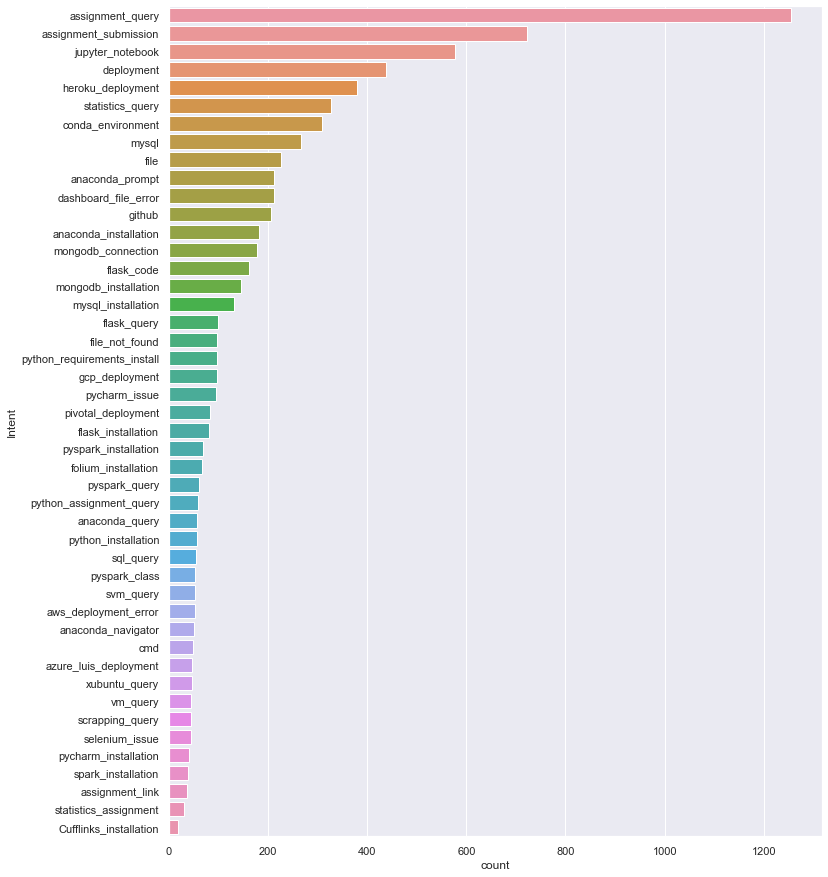

In [ ]:
# number of other queries by intent in descending order.
sns.set(rc={'figure.figsize':(11.7,15.27)})
sns.countplot(y='Intent', data=other_df , order=other_df['Intent'].value_counts().sort_values(ascending = False).index)
plt.show()

Merging all dataframes (ML, DL, BA, Other and General queries) in a single Dataframe.

Saved file in csv format.

In [ ]:
# Merging all dataframes(ML,Dl,BA,Other,General queries) in a single Dataframe.
final_data = pd.concat([ml_df,dl_df,ba_df,other_df,general_df]) 
final_data

,content,Intent,Type of Query,Category
570,for assignment of data visualization we need t...,assignment_data_visulization,Technical,Machine learning
571,what exactly we need to do when we say convert...,assignment_data_visulization,Technical,Machine learning
572,yes sir. it is assignment for data visualization,assignment_data_visulization,Technical,Machine learning
573,this is the question sir,assignment_data_visulization,Technical,Machine learning
574,its there in visualization assignment,assignment_data_visulization,Technical,Machine learning
...,...,...,...,...
52254,i wanted to know how do you call while attendi...,zoom_platform_query,Non Technical,General
52255,dl course today...zoom attendees reached 1000....,zoom_platform_query,Non Technical,General
52256,zoom app was not working well aind even attend...,zoom_platform_query,Non Technical,General
52257,is their any change in settings that need to b...,zoom_platform_query,Non Technical,General


In [ ]:
 # saving as csv file.
final_data.to_csv("final_data.csv", index=False)

In [ ]:
 # Total number of intents. 
len(final_data['Intent'].unique())   

177

## Count of "Type of Query"

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

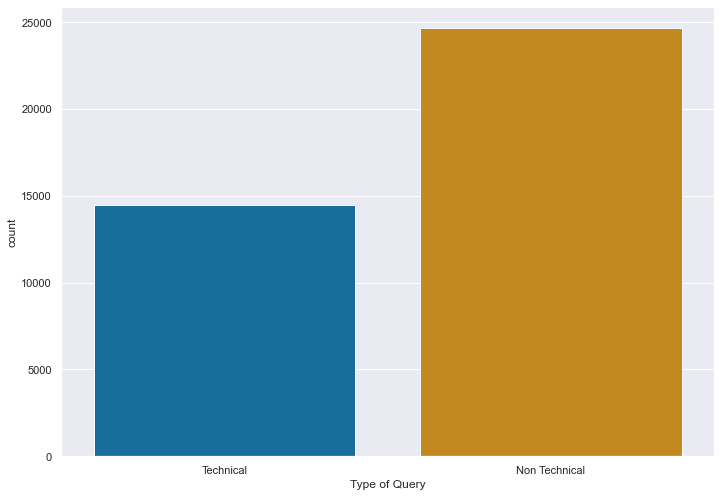

In [ ]:
# sns.countplot gives count of a particular Type of query.
sns.set_palette("colorblind")
sns.countplot(data=final_data,x ='Type of Query')
plt.show()

## Count of "Category" to which query belongs

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

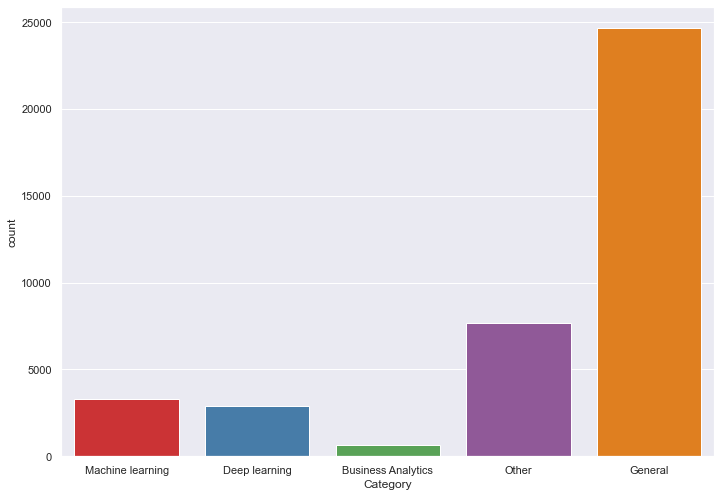

In [ ]:
#Gives count of each values in category column

sns.countplot(data=final_data,x='Category' , palette="Set1")
plt.show()

## Insights:
1. As observed from charts, General / Non Technical queries are 64 and Technical Queries are 113.
2. Category wise in Technical Queries, Other category type quries are asked more. Other categories include queries which are common between DL,ML,BA. 
3. When including all Categories of Technical and General Queries, General Queries are highest.
4. Highest number of queries is Welcome query and next highest is internship query.
5. There are 177 unique intents. 

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91817\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove stopwords function 
def rem_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text

In [ ]:
def replace_encoding(text):
    line = text.replace('&quot;', '')
    line = line.replace('&apos;', '')
    line = line.replace('&amp;', '')
    line = line.replace('&lt;', '')
    line = line.replace('&gt;', '')
    line = line.replace('&laquo;', '')
    line = line.replace('&raquo;', '')
    line = line.replace('&#039;', '')
    line = line.replace('&#8220;', '')
    line = line.replace('&#8221;', '')
    line = line.replace('&#8216;', '')
    line = line.replace('&#8217;', '')
    line = line.replace('&#9632;', '')
    line = line.replace('&#8226;', '')
    return line

In [ ]:
def preprocessing(raw_msg):
    
    raw_msg=replace_encoding(raw_msg)
    
    # Remove punctuations
    raw_msg=re.sub(r'[^\w\s]', ' ', raw_msg)
    
    # Converting string to lower case
    raw_msg=raw_msg.lower().strip()
    
    # Removing `\n` from the string
    raw_msg=raw_msg.replace('\n',' ')
  
    #Replace digits with empty char
    cleaned_msg=re.sub("\d+", "", raw_msg)
    
    #Remove stopwords
    cleaned_list=rem_stopwords(cleaned_msg)
    #print(cleaned_list)
    
    cleaned_list=[Word(word).lemmatize() for word in cleaned_list]
    
    #print(cleaned_list)
    cleaned_msg=' '.join(cleaned_list)
    
    return cleaned_msg

In [ ]:
final_data= pd.read_csv("final_data.csv")
final_data

,content,Intent,Type of Query,Category
0,for assignment of data visualization we need t...,assignment_data_visulization,Technical,Machine learning
1,what exactly we need to do when we say convert...,assignment_data_visulization,Technical,Machine learning
2,yes sir. it is assignment for data visualization,assignment_data_visulization,Technical,Machine learning
3,this is the question sir,assignment_data_visulization,Technical,Machine learning
4,its there in visualization assignment,assignment_data_visulization,Technical,Machine learning
...,...,...,...,...
39114,i wanted to know how do you call while attendi...,zoom_platform_query,Non Technical,General
39115,dl course today...zoom attendees reached 1000....,zoom_platform_query,Non Technical,General
39116,zoom app was not working well aind even attend...,zoom_platform_query,Non Technical,General
39117,is their any change in settings that need to b...,zoom_platform_query,Non Technical,General


In [ ]:
final_data.columns

Index(['content', 'Intent', 'Type of Query', 'Category'], dtype='object')

In [ ]:
final_data[final_data.content.isna()]

,content,Intent,Type of Query,Category
541,NaN,assignment_python,Technical,Machine learning
1951,NaN,pandas_query,Technical,Machine learning
1955,NaN,pandas_query,Technical,Machine learning
1956,NaN,pandas_query,Technical,Machine learning
3027,NaN,visualization_query,Technical,Machine learning
...,...,...,...,...
38634,NaN,youtube_video_availability,Non Technical,General
38635,NaN,youtube_video_availability,Non Technical,General
38651,NaN,youtube_video_availability,Non Technical,General
38971,NaN,zoom_platform_query,Non Technical,General


In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in final_data.content:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    #print(tokens)
    comment_words += " ".join(tokens)+" "
    #print(comment_words[100])

In [ ]:
comment_words=' '.join(list(set(comment_words.split())))

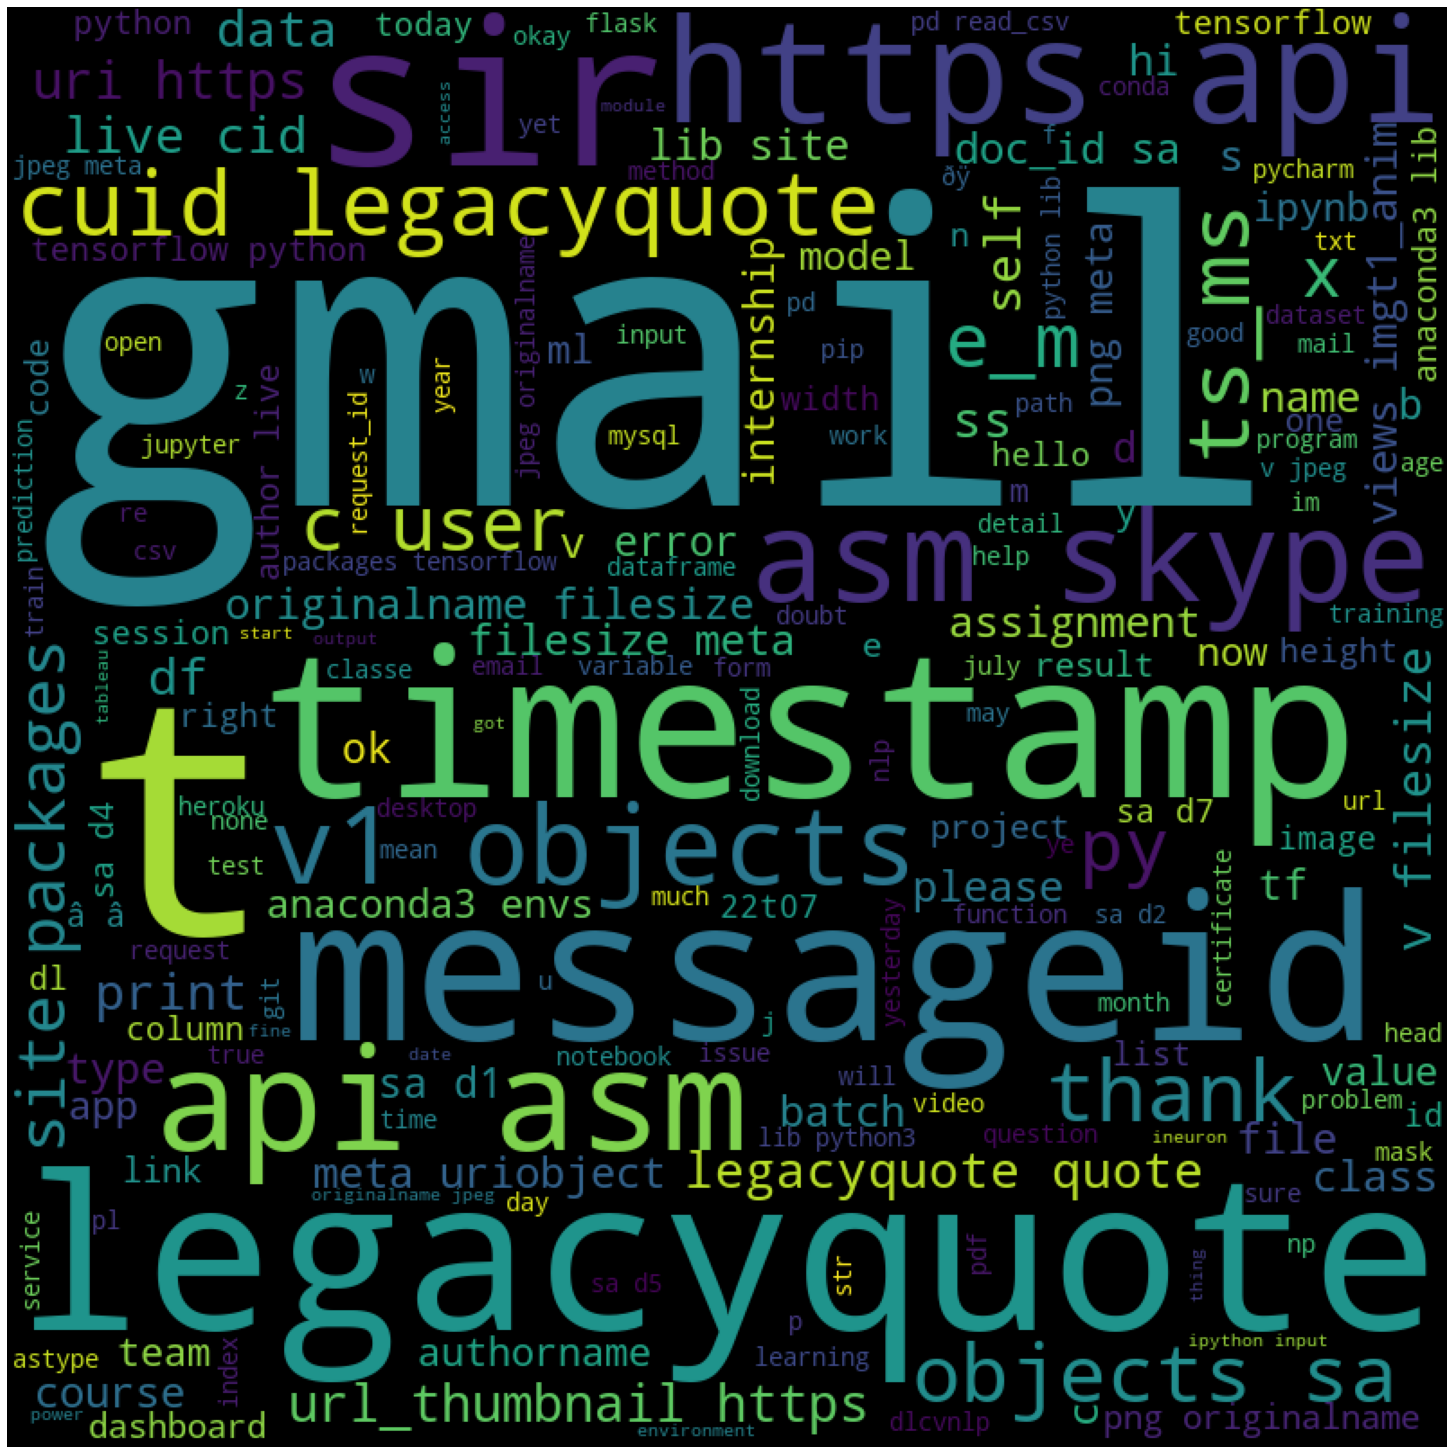

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import pickle
from tqdm import tqdm
import os

### Train and Test Model

In this next section we will train and test the models.

In [ ]:
tmp_dict=(final_data['Intent'].value_counts()<10).to_dict()
remove_intent=[key for key in tmp_dict if tmp_dict[key]==True]

In [ ]:
df_text=final_data[~final_data.Intent.isin(remove_intent)]

In [ ]:
df_text['Intent'].value_counts()

welcome_reply             3530
internship_query          2953
batch_details             2502
user_email                2153
assignment_query          1254
                          ... 
dax_query                   28
wafer_fault_detection       21
Cufflinks_installation      19
assignment_KNN              18
bot_timing                  15
Name: Intent, Length: 171, dtype: int64

In [ ]:
df_text.shape

(39103, 4)

In [ ]:
df_text.columns

Index(['content', 'Intent', 'Type of Query', 'Category'], dtype='object')

In [ ]:
final_data.describe()

,content,Intent,Type of Query,Category
count,38186,39119,39119,39119
unique,37031,177,2,5
top,my email id is,welcome_reply,Non Technical,General
freq,43,3530,24653,24653


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39119 entries, 0 to 39118
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        38186 non-null  object
 1   Intent         39119 non-null  object
 2   Type of Query  39119 non-null  object
 3   Category       39119 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from pandas_profiling import ProfileReport
import ipywidgets

In [ ]:
profile = ProfileReport(final_data, title='Profile Report', explorative=True)
profile

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]